In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import

datafile = '../data/prepped_data_whole.csv'

df = pd.read_csv(datafile)

df.head()

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
0,tnt,Society & Solitude #7,8.0,45.552157,4.38,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
1,tnt,Riwaka Single Hop Pale Ale,5.2,45.552157,4.14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
2,tnt,"Walk, Don't Run",3.7,45.552157,4.10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.50
3,tnt,Czech Two,4.1,39.000000,3.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
4,tnt,Spirit of Revolt,8.2,52.000000,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


## Find Top 5 Most Similar

In [3]:
piv = pd.pivot_table(data=df, index='username', columns='beer_name', values='user_rating', fill_value=0)
piv

beer_name,"""Body"" System","""Not Just Some"" Oatmeal Stout","""That Guy"" Rye","""V""","""michelle"" Sour Red Saison",#001 India Pale Ale Dry Hop Cascade,#004 Tysk Hveteøl Bavarian Tettnanger,#007 Tsjekkisk Pilsner Bohemian Saaz,#097 Soken Bitter,#100,...,Żywiec,Żywiec APA,Żywiec Białe,Żywiec Sesyjne IPA,‘Tis the Saison,₡hop Shop #1,₡hop Shop #4,√225 Saison,√225 Saison Zymatore - Calvados & Whiskey & Sherry Barrels,日本から来たネコ (Some Cat From Japan)
username,,,,,,,,,,,,,,,,,,,,,
AlexKress,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0,0
CapteinAwsome,0,0.0,0.00,0.00,0.00,3.50,3.5,1.50,0.0,0.0,...,0.00,0.00,2.75,2.75,0,0,0.0,4.00,0,0
Davidnorman,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0,0
Fear_the_Beerd,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0,0
Florindobucci,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0,0
Heidistrand,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,2,0
JustinX03,4,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,3.50,0,0
Justinswaldrip,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0,0
Lookaszk,0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0,0


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
X = piv.iloc[-1:,:]
Y = piv.iloc[:-1,:]

sim = cosine_similarity(X,Y)
sim = sim.tolist()[0]

In [6]:
sim_df = pd.DataFrame.from_dict(dict(zip(Y.index, sim)), orient='index').reset_index()
sim_df.columns = ['username', 'cos_sim']
sim_df.sort_values('cos_sim', ascending=False)

,username,cos_sim
4,Florindobucci,0.039014
28,emichael7390,0.037446
0,AlexKress,0.027732
3,Fear_the_Beerd,0.026869
19,SestervikensBryggeri_Lars,0.020740
18,RudyCptn93,0.019737
38,mattiasholm,0.017925
14,Nitro13,0.015334
43,tnt,0.014994
37,marcusSRG,0.014731


## Model Top 5

In [7]:
top_5 = list(sim_df.sort_values('cos_sim', ascending=False)[0:5]['username'])

In [8]:
top_5_df = df[df['username'].isin(top_5)]

In [9]:
top_5_df = top_5_df[~top_5_df['user_rating'].isna()]
top_5_df = top_5_df[~top_5_df['global_rating'].isna()]

In [10]:
top_5_df.shape

(3887, 3088)

In [11]:
top_5_df

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
9665,Fear_the_Beerd,Up the Creek Extreme Ale,12.50,143.000000,3.60,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.75
9666,Fear_the_Beerd,Everything I Hate About IPAs,7.00,22.000000,4.09,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.50
9667,Fear_the_Beerd,Woods & Waters,6.20,45.552157,3.99,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.25
9668,Fear_the_Beerd,Barrel Aged Righteous Ale,10.50,45.552157,3.95,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00
9669,Fear_the_Beerd,Progeny,6.00,45.552157,3.82,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.75
9670,Fear_the_Beerd,The Persistence of Memories,8.50,70.000000,4.25,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00
9671,Fear_the_Beerd,Bonedagger American Pale Ale,5.50,45.000000,3.92,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00
9672,Fear_the_Beerd,Hopslam Ale,10.00,45.552157,4.30,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.75
9673,Fear_the_Beerd,Jai Alai,7.50,70.000000,3.98,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.75
9674,Fear_the_Beerd,Voodoo Ranger Juicy Haze IPA,7.50,42.000000,3.79,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.00


In [12]:
from sklearn.preprocessing import StandardScaler

ibu = np.array(top_5_df['IBU']).reshape(-1,1)
ibu_scaler = StandardScaler()
ibu_scaler.fit(ibu)
ibu_scaled = ibu_scaler.transform(ibu)
top_5_df['IBU'] = ibu_scaled

abv = np.array(top_5_df['ABV']).reshape(-1,1)
abv_scaler = StandardScaler()
abv_scaler.fit(abv)
abv_scaled = abv_scaler.transform(abv)
top_5_df['ABV'] = abv_scaled

global_rating = np.array(top_5_df['global_rating']).reshape(-1,1)
global_rating_scaler = StandardScaler()
global_rating_scaler.fit(global_rating)
global_rating_scaled = global_rating_scaler.transform(global_rating)
top_5_df['global_rating'] = global_rating_scaled

user_rating = np.array(top_5_df['user_rating']).reshape(-1,1)
user_rating_scaler = StandardScaler()
user_rating_scaler.fit(user_rating)
user_rating_scaled = user_rating_scaler.transform(user_rating)
top_5_df['user_rating'] = user_rating_scaled

In [13]:
top_5_df

,username,beer_name,ABV,IBU,global_rating,total,beertype_Adambier,beertype_Altbier,beertype_American Wild Ale,beertype_Australian Sparkling Ale,...,brewery_Örebro Brygghus,brewery_ØL,brewery_ØLKYMISTEN,brewery_Ølgaard,brewery_Ølhuset Drømmer & Divan,brewery_Ølsmia,brewery_Ørbæk Bryggeri,brewery_Švyturys,brewery_Žatecký pivovar,user_rating
9665,Fear_the_Beerd,Up the Creek Extreme Ale,2.689743,5.034638,0.001964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.138656
9666,Fear_the_Beerd,Everything I Hate About IPAs,0.151816,-1.215713,0.941737,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.252743
9667,Fear_the_Beerd,Woods & Waters,-0.217337,0.000892,0.749947,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.921454
9668,Fear_the_Beerd,Barrel Aged Righteous Ale,1.766861,0.000892,0.673231,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.530055
9669,Fear_the_Beerd,Progeny,-0.309625,0.000892,0.423903,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.138656
9670,Fear_the_Beerd,The Persistence of Memories,0.843978,1.263765,1.248602,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.530055
9671,Fear_the_Beerd,Bonedagger American Pale Ale,-0.540345,-0.027630,0.615693,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.530055
9672,Fear_the_Beerd,Hopslam Ale,1.536140,0.000892,1.344497,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.138656
9673,Fear_the_Beerd,Jai Alai,0.382537,1.263765,0.730768,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.138656
9674,Fear_the_Beerd,Voodoo Ranger Juicy Haze IPA,0.382537,-0.182597,0.366366,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.530055


In [14]:
x = top_5_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
y = top_5_df['user_rating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [15]:
from sklearn.linear_model import LassoCV

In [16]:
lasso_cv = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=12)

In [17]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=False,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=12, selection='cyclic',
        tol=0.0001, verbose=False)

In [18]:
preds = lasso_cv.predict(X_test)

In [19]:
preds = user_rating_scaler.inverse_transform(preds)
y_test = user_rating_scaler.inverse_transform(y_test)

results_df = pd.DataFrame([preds, y_test]).transpose()
results_df.columns = ['predicted', 'actual']

results_df['error'] = results_df['predicted'] - results_df['actual']
results_df['abs_error'] = abs(results_df['error'])

results_df

,predicted,actual,error,abs_error
0,3.715756,4.25,-0.534244,0.534244
1,3.672103,3.75,-0.077897,0.077897
2,3.828682,3.75,0.078682,0.078682
3,3.837023,3.50,0.337023,0.337023
4,3.741312,4.25,-0.508688,0.508688
5,3.747071,4.50,-0.752929,0.752929
6,3.903839,4.50,-0.596161,0.596161
7,3.783089,3.00,0.783089,0.783089
8,3.345638,3.00,0.345638,0.345638
9,3.763664,3.75,0.013664,0.013664


In [20]:
# Performance Metrics 

print("% of points with less than 0.25 absolute error", 100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
print("% of points with less than 0.50 absolute error", 100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))

mse = np.mean(results_df['error']**2)
print('\n')
print('MSE =', mse)
print('RMSE =', np.sqrt(mse))

mae = np.mean(results_df['abs_error'])
print('\n')
print('MAE =', mae)
print('RMAE =', np.sqrt(mae))

% of points with less than 0.25 absolute error 40.102827763496144
% of points with less than 0.50 absolute error 69.9228791773779


MSE = 0.2663144919559789
RMSE = 0.5160566751394452


MAE = 0.3930211772908672
RMAE = 0.6269140110819563


''

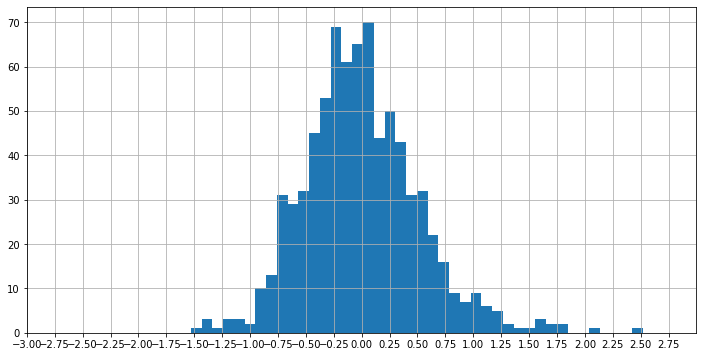

In [21]:
plt.figure(figsize=(12,6))

plt.hist(results_df['error'], bins=42)
plt.xlim(-3,3)
plt.xticks(ticks=(np.arange(-3, 3, step=0.25)))
plt.grid()
;

''

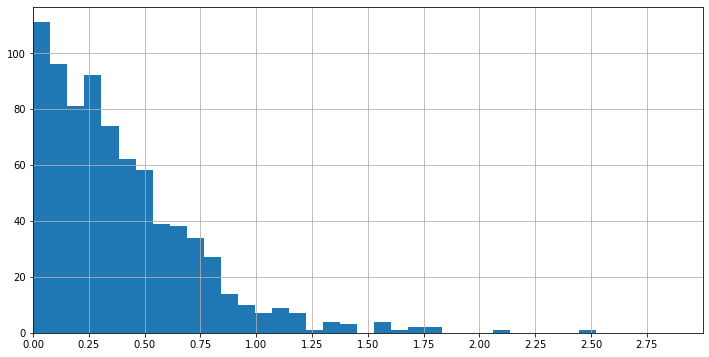

In [22]:
plt.figure(figsize=(12,6))

plt.hist(results_df['abs_error'], bins=33)
plt.xlim(0,3)
plt.xticks(ticks=(np.arange(0, 3, step=0.25)))
plt.grid()
;

## Iterate over # of Users

In [23]:
rand_state = 10

mae_list = []
quarter_abs_error_list = []
half_abs_error_list = []

n_list = [5,6,7,8,9,10]
for n in n_list:

    top_n = list(sim_df.sort_values('cos_sim', ascending=False)[0:n]['username'])

    top_n_df = df[df['username'].isin(top_n)]

    top_n_df = top_n_df[~top_n_df['user_rating'].isna()]
    top_n_df = top_n_df[~top_n_df['global_rating'].isna()]

    top_n_df.shape

    top_n_df

    from sklearn.preprocessing import StandardScaler

    ibu = np.array(top_n_df['IBU']).reshape(-1,1)
    ibu_scaler = StandardScaler()
    ibu_scaler.fit(ibu)
    ibu_scaled = ibu_scaler.transform(ibu)
    top_n_df['IBU'] = ibu_scaled

    abv = np.array(top_n_df['ABV']).reshape(-1,1)
    abv_scaler = StandardScaler()
    abv_scaler.fit(abv)
    abv_scaled = abv_scaler.transform(abv)
    top_n_df['ABV'] = abv_scaled

    global_rating = np.array(top_n_df['global_rating']).reshape(-1,1)
    global_rating_scaler = StandardScaler()
    global_rating_scaler.fit(global_rating)
    global_rating_scaled = global_rating_scaler.transform(global_rating)
    top_n_df['global_rating'] = global_rating_scaled

    user_rating = np.array(top_n_df['user_rating']).reshape(-1,1)
    user_rating_scaler = StandardScaler()
    user_rating_scaler.fit(user_rating)
    user_rating_scaled = user_rating_scaler.transform(user_rating)
    top_n_df['user_rating'] = user_rating_scaled

    top_n_df

    x = top_n_df.drop(['username', 'beer_name', 'user_rating'],axis=1)
    y = top_n_df['user_rating']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand_state)

    from sklearn.linear_model import LassoCV
    lasso_cv = LassoCV(fit_intercept=False, normalize=False, cv=5, random_state=rand_state)
    lasso_cv.fit(X_train, y_train)

    preds = lasso_cv.predict(X_test)
    preds = user_rating_scaler.inverse_transform(preds)
    y_test = user_rating_scaler.inverse_transform(y_test)

    results_df = pd.DataFrame([preds, y_test]).transpose()
    results_df.columns = ['predicted', 'actual']
    results_df['error'] = results_df['predicted'] - results_df['actual']
    results_df['abs_error'] = abs(results_df['error'])

    # Performance Metrics 

    print("% of points with less than 0.25 absolute error", 100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    print("% of points with less than 0.50 absolute error", 100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))

    mse = np.mean(results_df['error']**2)
    print('\n')
    print('MSE =', mse)
    print('RMSE =', np.sqrt(mse))

    mae = np.mean(results_df['abs_error'])
    print('\n')
    print('MAE =', mae)
    print('RMAE =', np.sqrt(mae))
    
    quarter_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.25])/len(results_df))
    half_abs_error_list.append(100*len(results_df[results_df['abs_error']<=0.50])/len(results_df))
    mae_list.append(mae)

% of points with less than 0.25 absolute error 36.88946015424165
% of points with less than 0.50 absolute error 67.22365038560412


MSE = 0.2914151407170326
RMSE = 0.5398288068610572


MAE = 0.4181394065394238
RMAE = 0.6466369975027905
% of points with less than 0.25 absolute error 39.72071373157486
% of points with less than 0.50 absolute error 71.91621411947246


MSE = 0.3011371830275544
RMSE = 0.5487596769329488


MAE = 0.4065573853441742
RMAE = 0.6376185265063855
% of points with less than 0.25 absolute error 38.697068403908794
% of points with less than 0.50 absolute error 68.07817589576547


MSE = 0.28759594017472123
RMSE = 0.5362797219499552


MAE = 0.411714025508175
RMAE = 0.64164945687515
% of points with less than 0.25 absolute error 41.41048824593128
% of points with less than 0.50 absolute error 70.5244122965642


MSE = 0.2877535775322139
RMSE = 0.5364266748887624


MAE = 0.40035107152739535
RMAE = 0.6327330175732853
% of points with less than 0.25 absolute error 42.8515318

Text(0, 0.5, 'Mean Absolute Error (MAE)')

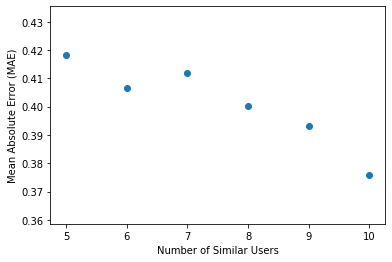

In [24]:
plt.scatter(n_list, mae_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('Mean Absolute Error (MAE)')

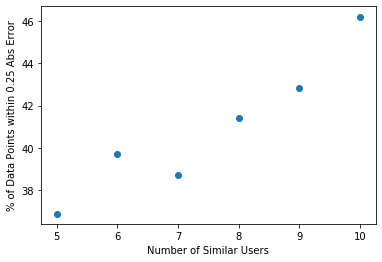

In [25]:
plt.scatter(n_list, quarter_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.25 Abs Error')
plt.show()

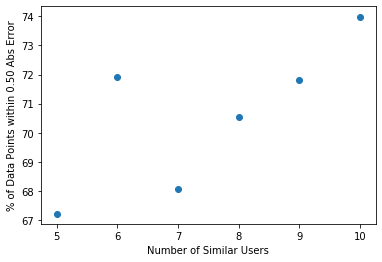

In [26]:
plt.scatter(n_list, half_abs_error_list)
plt.xlabel('Number of Similar Users')
plt.ylabel('% of Data Points within 0.50 Abs Error')
plt.show()

## Predict on Selected User's Data

In [29]:
my_data = df[df['username'] == 'tsharp93']

In [30]:
ibu = np.array(my_data['IBU']).reshape(-1,1)
ibu_scaler = StandardScaler()
ibu_scaler.fit(ibu)
ibu_scaled = ibu_scaler.transform(ibu)
my_data['IBU'] = ibu_scaled

abv = np.array(my_data['ABV']).reshape(-1,1)
abv_scaler = StandardScaler()
abv_scaler.fit(abv)
abv_scaled = abv_scaler.transform(abv)
my_data['ABV'] = abv_scaled

global_rating = np.array(my_data['global_rating']).reshape(-1,1)
global_rating_scaler = StandardScaler()
global_rating_scaler.fit(global_rating)
global_rating_scaled = global_rating_scaler.transform(global_rating)
my_data['global_rating'] = global_rating_scaled

user_rating = np.array(my_data['user_rating']).reshape(-1,1)
user_rating_scaler = StandardScaler()
user_rating_scaler.fit(user_rating)
user_rating_scaled = user_rating_scaler.transform(user_rating)
my_data['user_rating'] = user_rating_scaled

C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\tomsharp\AppData\Local\Continuum\miniconda3\envs\ml_guild\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [37]:
X = my_data.drop(['username', 'beer_name', 'user_rating'],axis=1)
Y = my_data['user_rating']

In [38]:
preds = lasso_cv.predict(X)

preds = user_rating_scaler.inverse_transform(preds)
Y = user_rating_scaler.inverse_transform(Y)

In [39]:
results_df = pd.DataFrame([preds, Y]).transpose()
results_df.columns = ['prediction', 'actual']
results_df['error'] = results_df['prediction'] - results_df['actual']
results_df['abs_error'] = abs(results_df['error'] )

results_df

,prediction,actual,error,abs_error
0,3.716818,3.50,0.216818,0.216818
1,3.802430,3.25,0.552430,0.552430
2,3.940202,3.25,0.690202,0.690202
3,3.779787,4.00,-0.220213,0.220213
4,3.993183,4.25,-0.256817,0.256817
5,4.016671,3.50,0.516671,0.516671
6,3.825024,4.50,-0.674976,0.674976
7,3.798795,4.25,-0.451205,0.451205
8,3.937360,4.50,-0.562640,0.562640
9,3.838614,3.25,0.588614,0.588614


In [40]:
mae = np.mean(results_df['abs_error'])
mae

0.3490922023245595